In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit,GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,root_mean_squared_error

In [2]:
x_train = pd.read_csv("C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\XTrain.csv")
y_train = pd.read_csv("C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\YTrain.csv")
engine = np.array(pd.read_csv("C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\Engine.csv"))
Y_train=np.asarray(y_train).ravel()
Engine=engine.ravel()

In [3]:
xtest_data = pd.read_csv('C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\XTest.csv')
ytest_data  = pd.read_csv('C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\Ytest.csv')
engine_test_data = pd.read_csv('C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\Engine_test.csv')

In [4]:
y_test=np.asarray(ytest_data).ravel()

In [5]:
print(len(Y_train))
y_train_clipped=np.clip(Y_train,a_min=None,a_max=130)
print(len(y_train_clipped))
print(len(y_test))
y_test_clipped=np.clip(y_test,a_min=None,a_max=130)
print(len(y_test_clipped))
np.max(y_train_clipped)
np.max(y_test_clipped)

20631
20631
13096
13096


130

In [6]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,64,64,32,16),solver="lbfgs",random_state=42,activation="identity",alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.662467805703604
rmse:  22.099547943198036
testing accuracy
RMSE:  4.51065685634856
R2:  0.5197230344667919


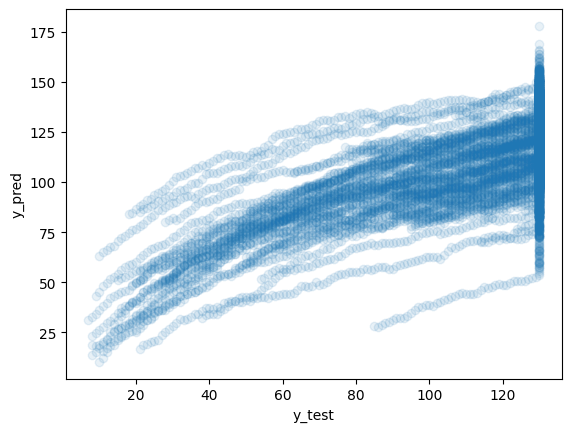

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(y_test_clipped,ypred,alpha=0.1,marker="o")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [15]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,16),solver="lbfgs",random_state=42,activation="identity",alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.6623254403284682
rmse:  22.107682962379517
testing accuracy
RMSE:  4.509249769221872
R2:  0.5203220384750515


In [16]:
import pickle
pickle.dump(mlp, open('mlp_clipped_model.pkl','wb')) 

In [7]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,16),solver="adam",random_state=42,activation="identity",alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.651275179457507
rmse:  22.307664220132686
testing accuracy
RMSE:  4.5165305141792444
R2:  0.5172165281661854


In [14]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(8,16,8),solver="adam",random_state=42,activation="identity",alpha=35,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.6382234412053747
rmse:  22.682203285798696
testing accuracy
RMSE:  4.572448726795699
R2:  0.49285987248719665


In [9]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,64,64,32,16),solver="adam",random_state=42,alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.7500203250491768
rmse:  21.2613230172619
testing accuracy
RMSE:  4.770454071663845
R2:  0.39914251654884125


In [10]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,64,64,32,16),solver="adam",random_state=42,alpha=5,learning_rate_init=0.01,max_iter=5000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.7500203250491768
rmse:  21.2613230172619
testing accuracy
RMSE:  4.770454071663845
R2:  0.39914251654884125


In [11]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,64,64,32,16),solver="lbfgs",random_state=42,alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res,

training accuracy
r2:  0.7637747466315321
rmse:  19.44295616795617
testing accuracy
RMSE:  4.691295051271881
R2:  0.43804234594557967


C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(8,16,32,64,32,8),solver="lbfgs",activation="relu",random_state=42,alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


KeyboardInterrupt: 

In [17]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(8,16,32,64,32,8),solver="lbfgs",activation="identity",random_state=42,alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.6622402957543088
rmse:  22.1058698673781
testing accuracy
RMSE:  4.511644468731556
R2:  0.5193022680037931


In [ ]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32,16),solver="lbfgs",activation="identity",random_state=42,alpha=5,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

In [19]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(32,64,32),solver="lbfgs",activation="identity",alpha=1,learning_rate_init=0.5,max_iter=1000)    
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.6621586777265553
rmse:  22.109452719227537
testing accuracy
RMSE:  4.51148432432142
R2:  0.5193705153638135


In [20]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, y_train_clipped, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train_clipped[train_index]
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train_clipped[val_index]
    
    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32),solver="lbfgs",random_state=42,activation="identity",alpha=1,learning_rate_init=0.01,max_iter=1000)    
    mlp.fit(xtrain, ytrain)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(y_test_clipped, ypred)))
print('R2: ' ,r2_score(y_test_clipped, ypred))

training accuracy
r2:  0.6624869155301532
rmse:  22.09823993675652
testing accuracy
RMSE:  4.508220752194719
R2:  0.5207597413140699
